### Kaggle Link
https://www.kaggle.com/c/porto-seguro-safe-driver-prediction

### Data Description

In the train and test data, features that belong to similar groupings are tagged as such in the feature names (e.g., *ind*, *reg*, *car*, *calc*). In addition, feature names include the postfix **bin** to indicate binary features and **cat** to indicate categorical features. Features without these designations are either continuous or ordinal. Values of *-1* indicate that the feature was missing from the observation. The target columns signifies whether or not a claim was filed for that policy holder.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings

sns.set(style='white')
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df_train = pd.read_csv('../Data/Kaggle/PortoSeguro/train.csv')
df_test  = pd.read_csv('../Data/Kaggle/PortoSeguro/test.csv')

In [4]:
df_ids = df_test['id']
for df in [df_train, df_test]:
    df.drop(['id'], axis=1, inplace=True)

In [5]:
df_train = df_train.replace(-1, np.NaN)

In [6]:
len(df_train)

595212

In [7]:
df_train.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,2,2.0,5,1.0,0.0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10.0,1.0,NaN,0,1.0,4,1.0,0,0.0,1,12,2.0,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,0,1,1.0,7,0.0,0.0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11.0,1.0,NaN,0,NaN,11,1.0,1,2.0,1,19,3.0,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,0,5,4.0,9,1.0,0.0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,NaN,7.0,1.0,NaN,0,NaN,14,1.0,1,2.0,1,60,1.0,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,0,0,1.0,2,0.0,0.0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7.0,1.0,0.0,0,1.0,11,1.0,1,3.0,1,104,1.0,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,0,0,2.0,0,1.0,0.0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11.0,1.0,NaN,0,NaN,14,1.0,1,2.0,1,82,3.0,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


### Exploratory Analysis

#### Missing Values

In [8]:
missing_columns = df_train.columns[df_train.isnull().any()].tolist()

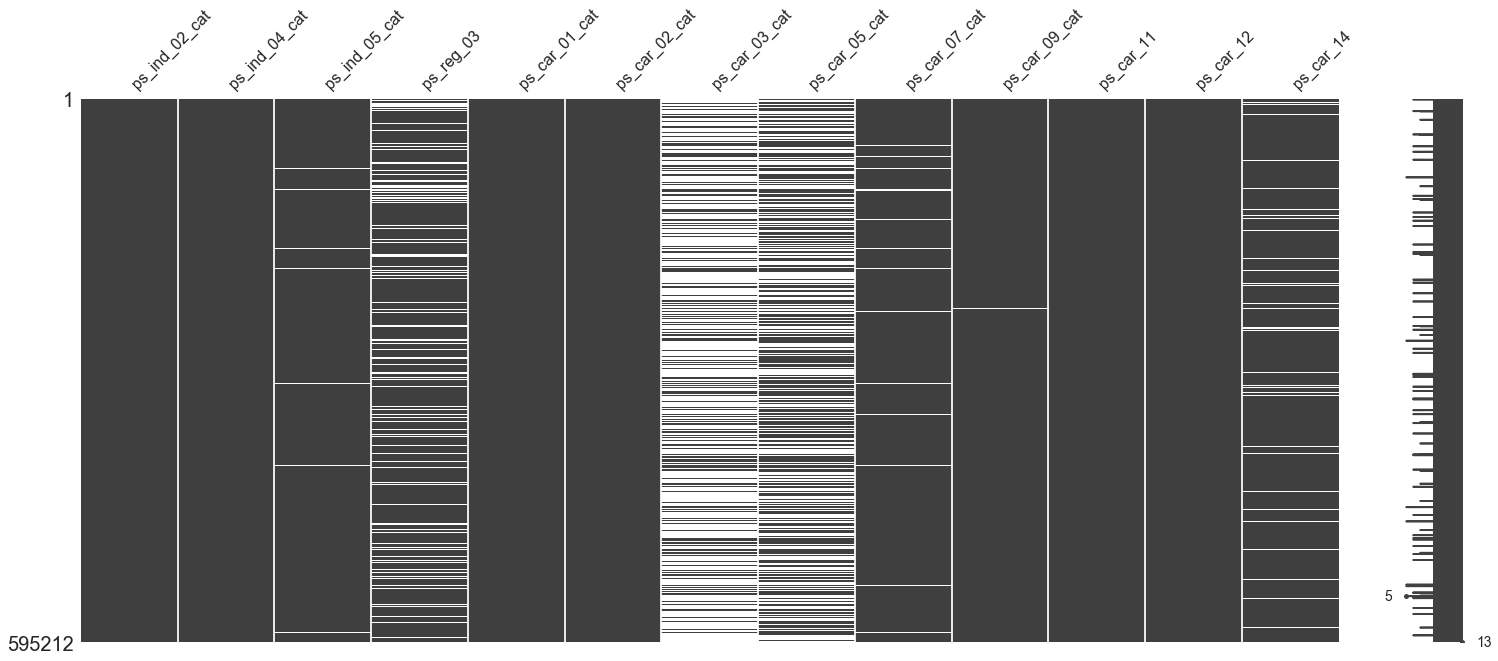

In [9]:
msno.matrix(df_train[missing_columns])

In [10]:
binary_feat = [c for c in df_train.columns if c.endswith('bin')]
categorical_feat = [c for c in df_train.columns if c.endswith('cat')]
other_feat = df_train.columns.difference(binary_feat + categorical_feat).values

In [11]:
for col in categorical_feat:
    df_train[col].fillna(value=df_train[col].mode()[0], inplace=True)
    df_test[col].fillna(value=df_test[col].mode()[0], inplace=True)
    
for col in binary_feat:
    df_train[col].fillna(value=df_train[col].mode()[0], inplace=True)
    df_test[col].fillna(value=df_test[col].mode()[0], inplace=True)
    
for col in other_feat:
    if col != 'target':
        df_train[col].fillna(value=df_train[col].mean(), inplace=True)
        df_test[col].fillna(value=df_test[col].mean(), inplace=True)

#### Distributions

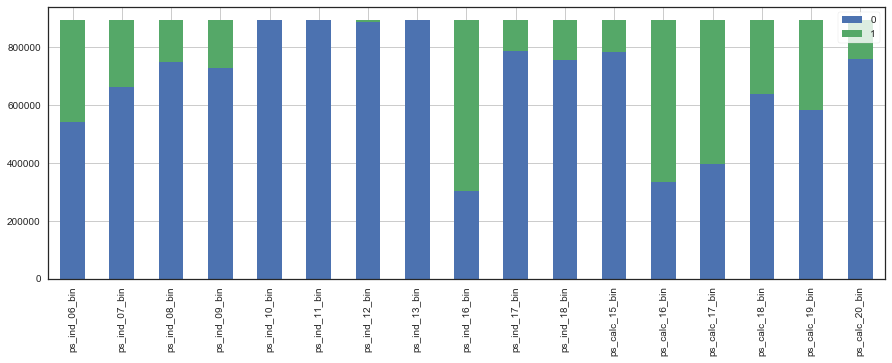

In [12]:
df[binary_feat].agg(pd.Series.value_counts).T.plot.bar(stacked=True, figsize=(15, 5), rot=90, grid=True) 
plt.legend(frameon=True)

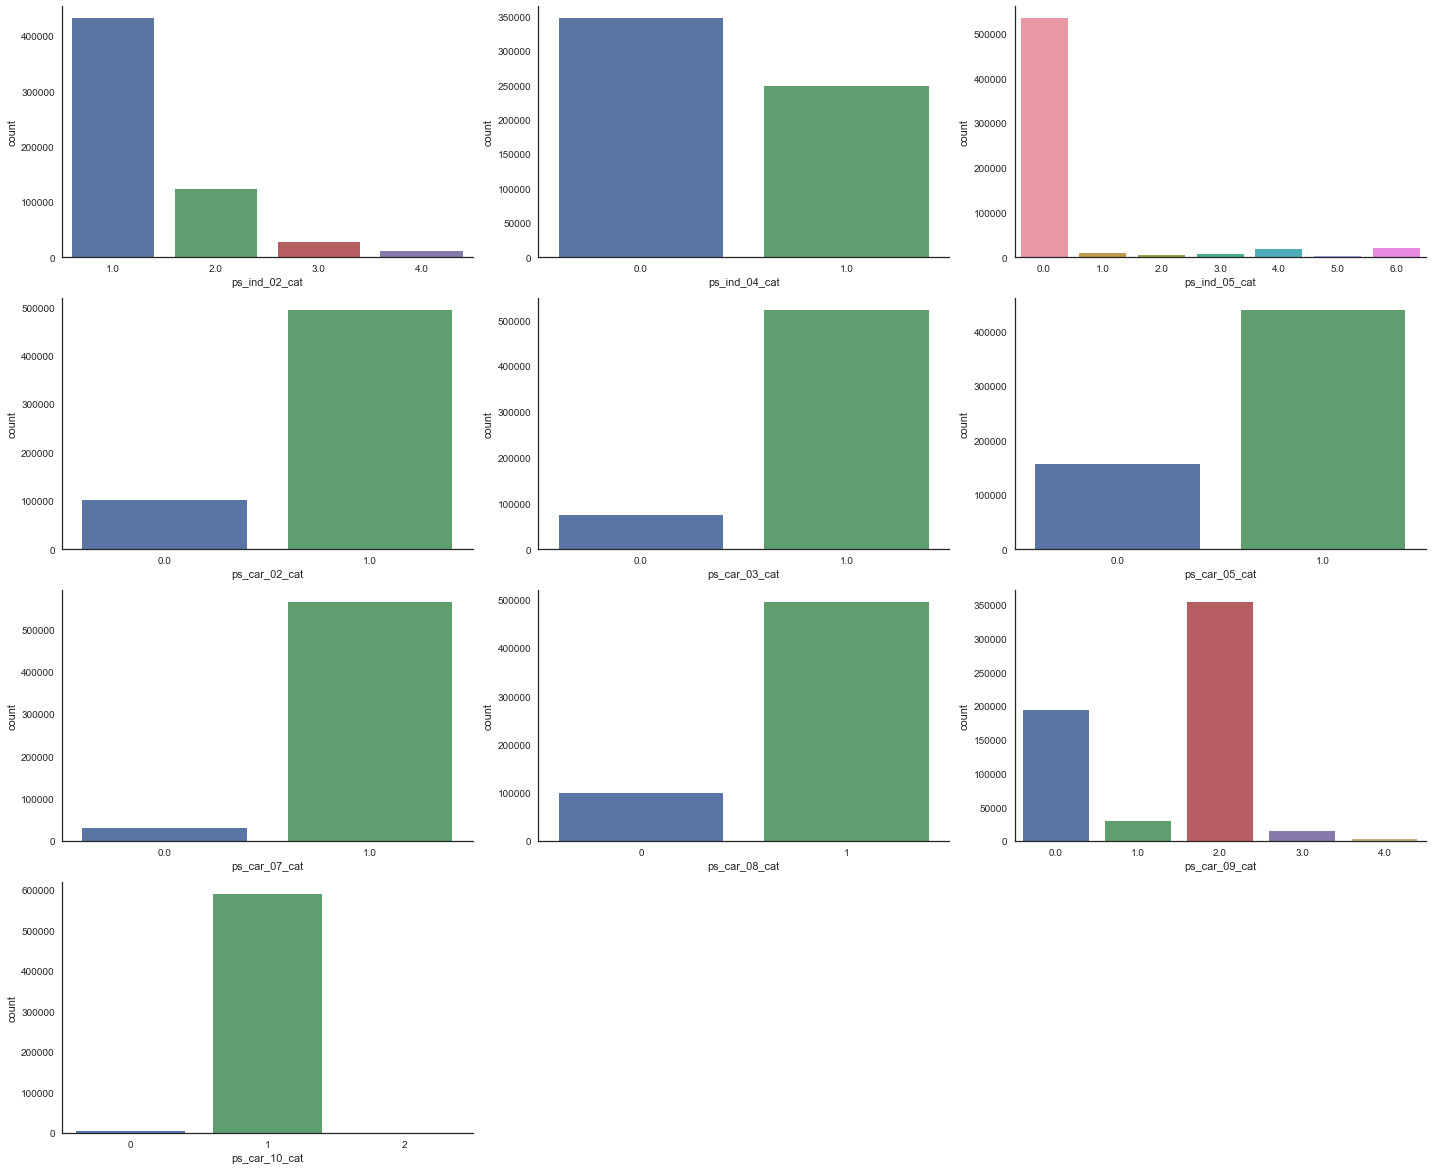

In [13]:
plt.figure(figsize=(20, 20))
i = 0
for c in categorical_feat:
    if df_train[c].nunique() < 10:
        ax = plt.subplot(5, 3, i+1)
        sns.countplot(df_train[c])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        i += 1
plt.tight_layout()

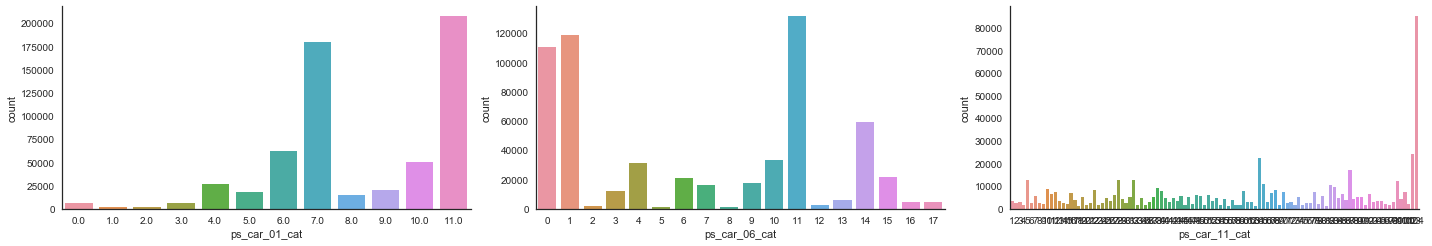

In [14]:
plt.figure(figsize=(20, 20))
i = 0
for c in categorical_feat:
    if df_train[c].nunique() > 10:
        ax = plt.subplot(6, 3, i+1)
        sns.countplot(df_train[c])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        i += 1
plt.tight_layout()

#### Correlations

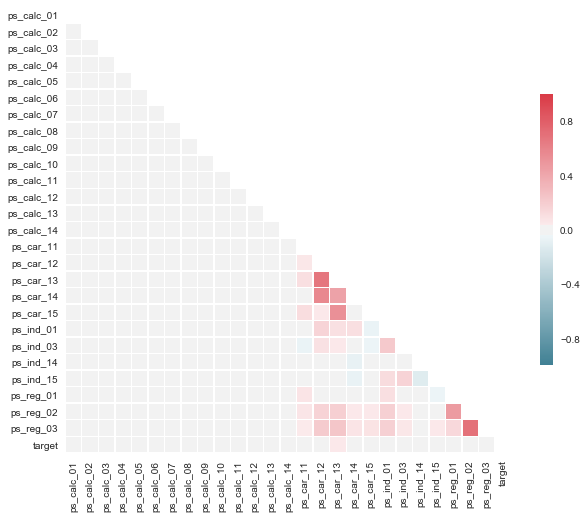

In [15]:
corr = df_train[other_feat].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

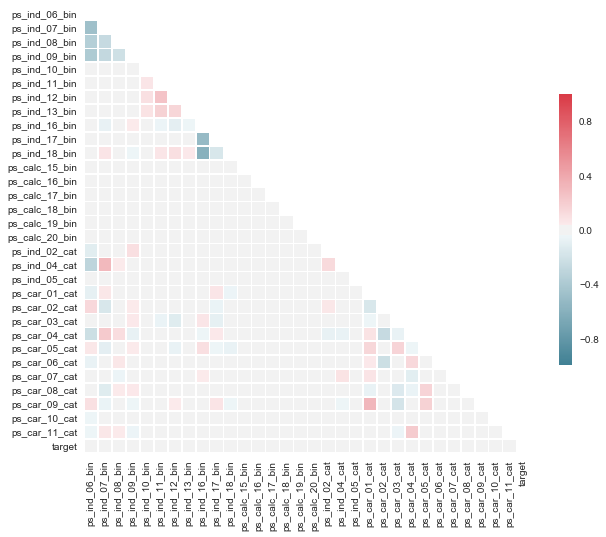

In [16]:
corr = df_train[binary_feat+categorical_feat+['target']].corr(method='spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

As can be seen, *ps\_calc\_\** doesn't seen to correlate to anything and will be drop to reduce the curse of dimensionality.

In [17]:
unwanted = df_train.columns[df_train.columns.str.startswith('ps_calc_')]
df_train = df_train.drop(unwanted, axis=1)  
df_test =  df_test.drop(unwanted, axis=1)  

*There are multiple phenomena referred to by this name in domains such as numerical analysis, sampling, combinatorics, machine learning, data mining, and databases. The common theme of these problems is that when the dimensionality increases, the volume of the space increases so fast that the available data become sparse. This sparsity is problematic for any method that requires statistical significance. In order to obtain a statistically sound and reliable result, the amount of data needed to support the result often grows exponentially with the dimensionality. Also, organizing and searching data often relies on detecting areas where objects form groups with similar properties; in high dimensional data, however, all objects appear to be sparse and dissimilar in many ways, which prevents common data organization strategies from being efficient.*

### Modeling

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [19]:
from sklearn.externals import joblib

In [20]:
from sklearn.utils.class_weight import compute_class_weight

In [21]:
df_sample = df_train.sample(frac=0.15)

In [22]:
X_train = df_train.drop(['target'], axis=1)
y_train = df_train['target']
X_valid = df_test

In [23]:
class_weight = compute_class_weight(class_weight='balanced', classes=y_train.unique(), y=y_train)

In [24]:
class_weight

array([  0.51891309,  13.71835531])

In [25]:
class_weight = {0: 0.51891309,  1: 13.71835531}

In [26]:
X_sample = df_sample.drop(['target'], axis=1)
y_sample = df_sample['target']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [28]:
#Remove redundant calls
def ginic(actual, pred):
    actual = np.asarray(actual) # In case, someone passes Series or list
    n = len(actual)
    a_s = actual[np.argsort(pred)]
    a_c = a_s.cumsum()
    giniSum = a_c.sum() / a_s.sum() - (n + 1) / 2.0
    return giniSum / n
 
def gini_normalizedc(a, p):
    if p.ndim == 2:  # Required for sklearn wrapper
        p = p[:,1]   # If proba array contains proba for both 0 and 1 classes, just pick class 1
    return ginic(a, p) / ginic(a, a)

#XGBoost
from sklearn import metrics
def gini_xgb(preds, dtrain):
    labels = dtrain.get_label()
    gini_score = gini_normalizedc(labels, preds)
    return [('gini', gini_score)]

#SKlearn
gini_sklearn = metrics.make_scorer(gini_normalizedc, True, True)

#### PCA

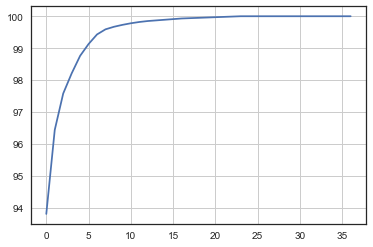

In [29]:
from sklearn.decomposition import PCA 

pca = PCA()
pca.fit(X_train)

var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.grid(True)
plt.plot(var)

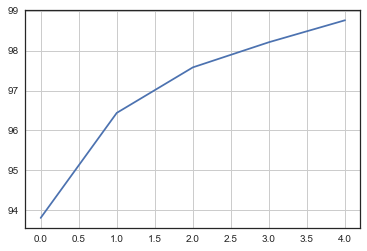

In [30]:
pca = PCA(n_components=5)
pca.fit(X_train)

var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.grid(True)
plt.plot(var)

In [31]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [32]:
X_valid_pca = pca.transform(X_valid)

#### XGBoost

In [33]:
def plot_importances(clf, features):
    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(15, 5))
    plt.title("Feature importances")
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), features[indices], rotation=90)
    plt.xlim([-1, len(importances)])
    plt.show()

In [34]:
warnings.filterwarnings('ignore', category=DeprecationWarning)
import xgboost as xgb

In [ ]:
warnings.filterwarnings('ignore', category=DeprecationWarning)
import xgboost as xgb

In [ ]:
clf_xgb_params = {
    'n_estimators':       [50, 100, 200, 300],
    'learning_rate':      [0.05, 0.1, 0.5],
    'max_depth':          [2, 3, 5, 7, 10],
    'min_child_weight':   [1, 3, 5, 7, 10],
    'subsample':          [0.3, 0.5, 0.8, 1.0],
    'colsample_bytree':   [0.3, 0.5, 0.7, 1.0],
    'colsample_bylevel':  [0.5, 0.7, 1.0]
}

##### NO PCA

In [35]:
clf_xgb = xgb.XGBRegressor(silent=1, objective='binary:logistic')
grid = GridSearchCV(clf_xgb, clf_xgb_params, scoring=gini_xgb, cv=3, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

print (grid.best_params_)

clf = grid.best_estimator_

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed: 173.1min finished


{'class_weight': {0: 0.51891309, 1: 13.71835531}, 'criterion': 'gini', 'min_samples_leaf': 15, 'min_samples_split': 15, 'n_estimators': 400}


In [ ]:
joblib.dump(clf, '../clf_xgb_PS.pkl') 

In [37]:
clf = joblib.load('../clf_xgb_PS.pkl')

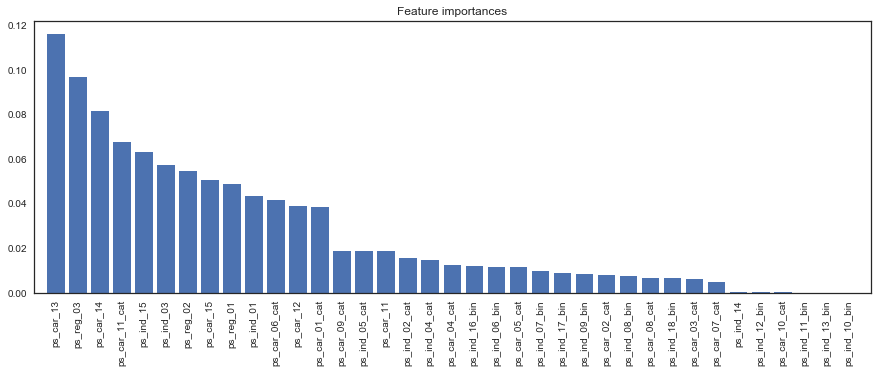

In [38]:
plot_importances(clf_xgb, X_train.columns.values)

In [39]:
scores = cross_val_score(clf, X_test, y_test, scoring=gini_sklearn, cv=3)
print("Gini Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Gini Score: 0.23 (+/- 0.02)


In [40]:
y_pred = clf.predict_proba(X_valid)

In [41]:
submission = pd.DataFrame({'id': df_ids, 'target': y_pred[:, 1]})
submission.to_csv('clf_rf-output.csv', index=False)